# Discussion 6: Cross Validation, ROC curves and Confusion Matrix

## Multiclass Classification with Linear SVM, RBF SVM and Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)

# Find the samples and features, X
nsamples, nfeatures = X.shape
# column stack for adding noisy features
X = np.c_[X, random_state.randn(nsamples, nfeatures)]

# shuffle and split training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2,
                                                    random_state=0)

# Linear SVM, RBF SVM, Logistic Regression

### 1. randomly pick C for linear SVM , C, gamma for rbf svm, C for logistic regression

In [3]:
# The low C will corresponds to higher regularization
# The high C will classify all training samples correctly

linearSVM = svm.SVC(kernel='linear', C=1)
linearSVM.fit(Xtrain, ytrain)
predictions = linearSVM.predict(Xtest)
score = linearSVM.score(Xtest, ytest)
print("linear SVM: ", score)

linear SVM:  0.9333333333333333


In [4]:
# kernel SVM with rbf 
# gamma measures how much influecne a single traning sample has
# The larger the gamma is, the closer other samples are affected

rbfSVM =  svm.SVC(kernel='rbf', gamma=0.1, C=1)
rbfSVM.fit(Xtrain, ytrain)
predictions = rbfSVM.predict(Xtest)
score = rbfSVM.score(Xtest, ytest)
print("rbf SVM:", score)

rbf SVM: 0.9333333333333333


In [5]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'lbfgs',max_iter=1000, fit_intercept=True)
LR.fit(Xtrain,ytrain)
predictions = LR.predict(Xtest)
score = LR.score(Xtest, ytest)
print("Logistic Regression:", score)

Logistic Regression: 0.9333333333333333


# Validation curve for Linear SVM, RBF SVM, Logistic Regression

# 1. Linear SVM

param range: [1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
test scores mean: [0.36666667 0.36666667 0.93333333 0.94166667 0.94166667 0.94166667]


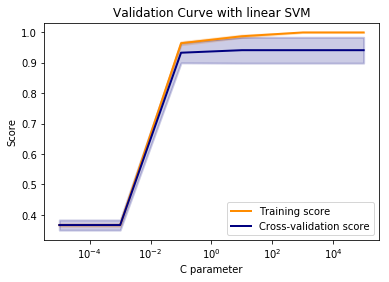

In [6]:
# Coarse-grained search for linear SVM

from sklearn.model_selection import validation_curve

# select from the range
param_range = np.logspace(-5,5, 6)

print("param range:", param_range)

train_scores, test_scores = validation_curve(
   linearSVM,Xtrain, ytrain, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("test scores mean:", test_scores_mean)

# Plot CV error as a function of C
plt.title("Validation Curve with linear SVM")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Choose the best hyperparameter for linear SVM

In [7]:
C_best1 = param_range[np.argsort(test_scores_mean)[-1]]
print("The best hyperparameter: ", C_best1)
dist = svm.SVC(kernel='linear', C = C_best1, probability = True)
dist.fit(Xtrain, ytrain)
acc_train = dist.score(Xtrain, ytrain)
acc_test = dist.score(Xtest, ytest)
print('Training accuracy:', acc_train)
print('Test accuracy:', acc_test)

The best hyperparameter:  100000.0
Training accuracy: 1.0
Test accuracy: 0.9666666666666667


# 2. RBF SVM

param range: [1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
test scores mean: [0.36666667 0.69166667 0.90833333 0.36666667 0.36666667 0.36666667]


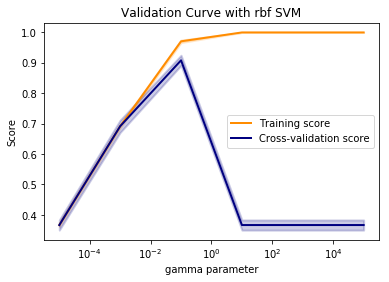

In [8]:
# Coarse-grained search for rbf SVM
from sklearn.model_selection import validation_curve

# select from the range
param_range = np.logspace(-5,5, 6)

print("param range:", param_range)

train_scores, test_scores = validation_curve(
   rbfSVM,Xtrain, ytrain, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("test scores mean:", test_scores_mean)

# Plot CV error as a function of gamma
plt.title("Validation Curve with rbf SVM")
plt.xlabel("gamma parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Choose the best scale hyperparameter for RBF SVM

In [9]:
gamma_best1 = param_range[np.argsort(test_scores_mean)[-1]]
print("The best hyperparameter: ", gamma_best1)
dist = svm.SVC(kernel='rbf', gamma = gamma_best1, C = 1)
dist.fit(Xtrain, ytrain)
acc_train = dist.score(Xtrain, ytrain)
acc_test = dist.score(Xtest, ytest)
print('Training accuracy:', acc_train)
print('Test accuracy:', acc_test)

The best hyperparameter:  0.1
Training accuracy: 0.9666666666666667
Test accuracy: 0.9333333333333333


# 3. Logistic Regression

param range: [1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
test scores mean: [0.36666667 0.69166667 0.90833333 0.94166667 0.94166667 0.93333333]


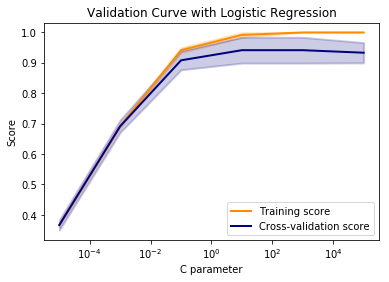

In [10]:
# Coarse-grained search for logistic regression

from sklearn.model_selection import validation_curve

# select the best C for logistic regression
LR.set_params(penalty='l2', max_iter = 10000)

# select from the range
param_range = np.logspace(-5,5, 6)

print("param range:", param_range)

train_scores, test_scores = validation_curve(
   LR,Xtrain, ytrain, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("test scores mean:", test_scores_mean)

# Plot CV error as a function of C
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Choose the best hyperparamter for Logistics Regression

In [11]:
C_best1 = param_range[np.argsort(test_scores_mean)[-1]]
print("The best hyperparameter: ", C_best1)
dist = LogisticRegression(solver = 'lbfgs', C = C_best1, max_iter=1000, fit_intercept=True)
dist.fit(Xtrain, ytrain)
acc_train = dist.score(Xtrain, ytrain)
acc_test = dist.score(Xtest, ytest)
print('Training accuracy:', acc_train)
print('Test accuracy:', acc_test)

The best hyperparameter:  1000.0
Training accuracy: 1.0
Test accuracy: 0.9333333333333333


# ROC curve

In [12]:
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


In [13]:
X = iris.data
y = iris.target

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)

# Find the samples and features, X
nsamples, nfeatures = X.shape

# column stack for adding noisy features
X = np.c_[X, random_state.randn(nsamples, nfeatures)]

# change the y to compute the ROC curve
y = label_binarize(y, classes=[0, 1, 2])

# split training and test sets

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,random_state=0)

## 1. ROC curve for Linear SVM

## Choose the C parameter derived from validation curve

In [14]:
# Set the probability = True to calculate the ROC curve
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', C = 100000.0, probability = True))
y_score = classifier.fit(Xtrain, ytrain).decision_function(Xtest)

In [29]:
# Compute ROC curve and ROC area for each class

# hint: create the dict() to store TPR and FPR values 

################################################

fpr = dict()
tpr = dict()
roc_auc = dict()
classes = ytrain.shape[1]

for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

################################################

## Plot the ROC curve for specific class = 2

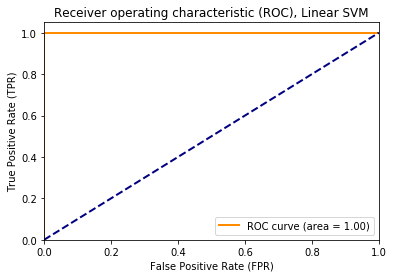

In [27]:
lw = 2
classnum = 2
plt.plot(fpr[classnum], tpr[classnum], color='darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc[classnum])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic (ROC), Linear SVM')
plt.legend(loc="lower right")
plt.show()

## 2. ROC curve for RBF SVM

## Choose the C parameter derived from validation curve

In [17]:
# Set the probability = True to calculate the ROC curve
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', gamma = 0.1, C = 1, probability = True))
y_score = classifier.fit(Xtrain, ytrain).decision_function(Xtest)

In [18]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = ytrain.shape[1]

for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

## Plot the ROC curve for specific class = 2

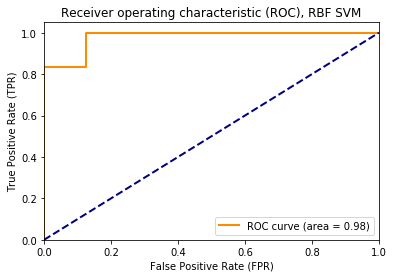

In [19]:
lw = 2
classnum = 2
plt.plot(fpr[classnum], tpr[classnum], color='darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc[classnum])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic (ROC), RBF SVM')
plt.legend(loc="lower right")
plt.show()

## 3. ROC curve for Logistic Regression

## Choose the C parameter derived from validation curve

In [20]:
# Set the probability = True to calculate the ROC curve
classifier = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs', C = 1000.0, max_iter=1000, fit_intercept=True))
y_score = classifier.fit(Xtrain, ytrain).decision_function(Xtest)

In [21]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = ytrain.shape[1]

for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

## Plot the ROC curve for specific class = 2

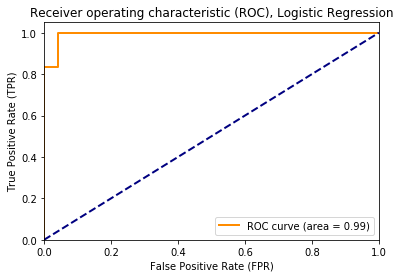

In [22]:
lw = 2
classnum = 2
plt.plot(fpr[classnum], tpr[classnum], color='darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc[classnum])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic (ROC), Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix

In [23]:
# Apply the original data
X = iris.data
y = iris.target
class_names = iris.target_names

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.5,random_state=0)

## 1. Linear SVM

## Choose the C parameter derived from validation curve

Confusion matrix, no normalization
[[21  0  0]
 [ 0 29  1]
 [ 0  1 23]]


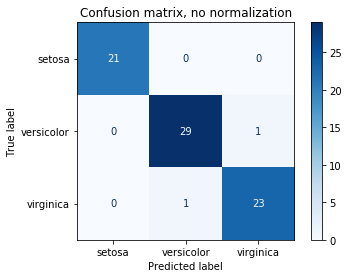

In [24]:
from sklearn.metrics import plot_confusion_matrix

classifier = svm.SVC(kernel='linear', C = 10000.0).fit(Xtrain, ytrain)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, no normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, Xtest, ytest,
                                 display_labels=class_names,
                                 cmap = plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [25]:
from sklearn.metrics import classification_report

# TP = True Positive 
# FP = False Positive
# TN = True Negative
# FN = False Negative

# Precision, TP / (TP + FP)
# Recall, TP/ (TP + TN)
# Accuracy, (TP + TN) / (TP + TN + FP + FN)
# F1-score, 2 * Precision * Recall / (Precision + Recall)

predictions = classifier.predict(Xtest)
print(classification_report(ytest, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.97      0.97        30
           2       0.96      0.96      0.96        24

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.97      0.97      0.97        75



## 2. RBF SVM 

Confusion matrix, no normalization
[[21  0  0]
 [ 0 29  1]
 [ 0  3 21]]


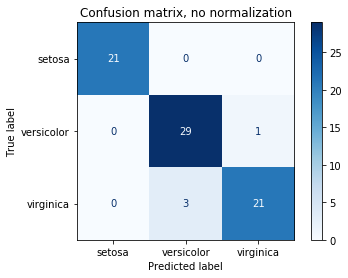

In [26]:
from sklearn.metrics import plot_confusion_matrix

classifier = svm.SVC(kernel='rbf', gamma = 0.1, C = 1).fit(Xtrain, ytrain)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, no normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, Xtest, ytest,
                                 display_labels=class_names,
                                 cmap = plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [27]:
from sklearn.metrics import classification_report

# TP = True Positive 
# FP = False Positive
# TN = True Negative
# FN = False Negative

# Precision, TP / (TP + FP)
# Recall, TP/ (TP + TN)
# Accuracy, (TP + TN) / (TP + TN + FP + FN)
# F1-score, 2 * Precision * Recall / (Precision + Recall)

predictions = classifier.predict(Xtest)
print(classification_report(ytest, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.91      0.97      0.94        30
           2       0.95      0.88      0.91        24

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



## 3. Logistic Regression

Confusion matrix, no normalization
[[21  0  0]
 [ 0 29  1]
 [ 0  1 23]]


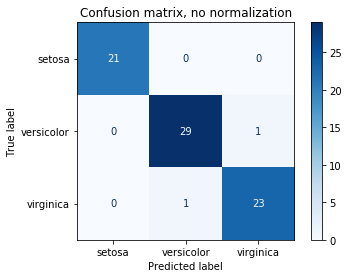

In [28]:
from sklearn.metrics import plot_confusion_matrix

classifier = LogisticRegression(solver = 'lbfgs', C = 1000.0, max_iter=1000, fit_intercept=True).fit(Xtrain, ytrain)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, no normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, Xtest, ytest,
                                 display_labels=class_names,
                                 cmap = plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [29]:
from sklearn.metrics import classification_report

# TP = True Positive 
# FP = False Positive
# TN = True Negative
# FN = False Negative

# Precision, TP / (TP + FP)
# Recall, TP/ (TP + TN)
# Accuracy, (TP + TN) / (TP + TN + FP + FN)
# F1-score, 2 * Precision * Recall / (Precision + Recall)

predictions = classifier.predict(Xtest)
print(classification_report(ytest, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.97      0.97        30
           2       0.96      0.96      0.96        24

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.97      0.97      0.97        75

